In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import regex as re
from nltk.stem import PorterStemmer
from matplotlib.colors import ListedColormap

In [2]:
def plot_data(dataset,labels):
    X,y = dataset[:,0:-1],dataset[:,-1]
    length = len(X)
    pos = (y==labels[1]).reshape(length,1)
    neg = (y==labels[0]).reshape(length,1)
    plt.scatter(dataset[pos[:,0],0],dataset[pos[:,0],1],c='red',marker='+')
    plt.scatter(dataset[neg[:,0],0],dataset[neg[:,0],1],c='blue',marker='x')
    
    plt.show()

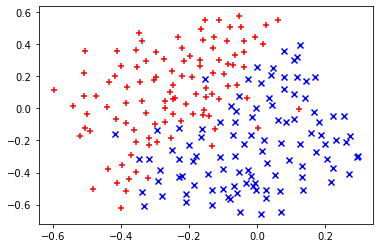

In [3]:
def load__plot_data():
    data = loadmat("datasets/sampleData.mat")
    X,y = data['X'],data['y']
    y = y.astype(float)
    y[y==0]=-1
    #plot the data
    dataset = np.append(X,y,axis=1)
    labels = np.unique(dataset[:,-1])
    plot_data(dataset,labels)
    
    return X,y,dataset,labels

X,y,dataset,labels = load__plot_data()

In [4]:
def gaussian_kernel(X,sigma):
    Xdash = np.sum(X**2,axis=1)
    K = Xdash + Xdash[:,None] - 2 * np.dot(X,X.T)
    K /= 2*(sigma**2)
    
    K = np.exp(-K)
    
    return K

In [5]:
sigma = 0.3
K = gaussian_kernel(X,sigma)

In [6]:
def Initialize_params(X,m):
    w = np.zeros((X.shape[1],1))
    
    return w

In [7]:
w = Initialize_params(K,len(K))

In [8]:
def Cost_fn(X,y,w,C):
    distance = 1 - y*np.dot(X,w)
    distance[distance < 0] = 0
    N =len(y)
    hinge_loss = (C * np.sum(distance))/N
    cost = (1/2) * np.dot(w.T,w) + hinge_loss
    return float(cost[0])

In [9]:
def gradient(X,y,w,C):
    output = 1 - y*np.dot(X,w)
    dw = np.zeros((len(w),1))
    for i,out in enumerate(output):
        if max(0,out) == 0:
            di = w
        else:
            di = w - C*y[i]*X[i].reshape(X.shape[1],1)
        dw += di
        
    return dw/len(y)

In [10]:
def Train_algo(X,y,w,ephocs,C,alpha):
    J = []
    w = np.zeros((X.shape[1],1))
    for i in range(ephocs):
        dw = gradient(X,y,w,C)
        w = w - alpha*dw
        J.append(Cost_fn(X,y,w,C))
    
    return J,w

In [11]:
C = 0.64
alpha = 0.1
iterations = 100
J,w = Train_algo(K,y,w,iterations,C,alpha)

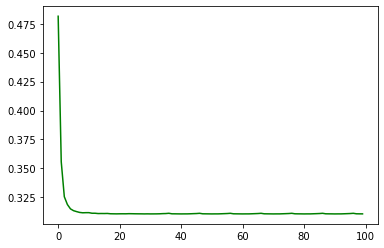

In [12]:
ephocs = [i for i in range(iterations)]
plt.plot(ephocs,J,color='green')
plt.show()

In [13]:
#Calculate accuracy on the training set
y1 = np.sign(np.dot(K,w))

print("The accuracy for the training set:",np.mean(y1==y)*100)

The accuracy for the training set: 85.78199052132702


## Test the Model

In [14]:
def Predict(X,w,xtest):
    #reshape the test array
    xtest = xtest.reshape(1,xtest.shape[0])

    #find the Kernel for the test array
    xtestKernal = np.sum((X - xtest)**2,axis=1)
    xtestKernal = xtestKernal.reshape(1,xtestKernal.shape[0])
    xtestKernal /= 2*(sigma**2) 
    xtestKernal = np.exp(-xtestKernal)
    
    pred = float(np.sign(np.dot(xtestKernal,w))[0])
    
    return pred

In [15]:
xtest = np.array([0.19,-0.4])

#Predict the output for the given test data. 
#Note: The expected output is -1

pred = Predict(X,w,xtest)

print("The predicted class for the Input data",xtest,"is:",pred)

The predicted class for the Input data [ 0.19 -0.4 ] is: -1.0


## Decision Boundary

In [16]:
def Plot_decisionBoundary(X,y,w):
    x_min,x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
    y_min,y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
    xplot,yplot = np.meshgrid(np.arange(x_min,x_max,0.5),np.arange(y_min,y_max,0.5))
    
    samples = np.c_[xplot.ravel(),yplot.ravel()]
    pred_val = np.zeros((samples.shape[0],1))
    
    for i in range(samples.shape[0]):
        pred_val[i] = Predict(X,w,samples[i,:])
        
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure()
    plt.pcolormesh(xplot, yplot, pred_val.reshape(xplot.shape), cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,marker='x')
    plt.xlim(np.min(X[:,0])-0.2,np.max(X[:,0])+0.2)
    plt.ylim(np.min(X[:,1])-0.2,np.max(X[:,1])+0.2)

    plt.show()

<ipython-input-16-0da197ffd1eb>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xplot, yplot, pred_val.reshape(xplot.shape), cmap=cmap_light)


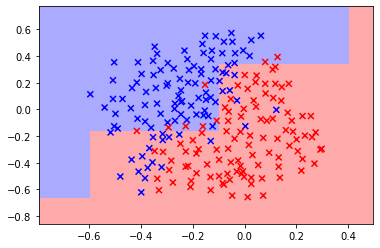

In [17]:
Plot_decisionBoundary(X,y,w)